In [2]:
import os, pandas as pd
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point, geom_smooth, ggtitle, xlab, ylab, theme_minimal

%matplotlib inline

DATASET_ID = "catherinerasgaitis/mxmh-survey-results"
path = kagglehub.dataset_download(DATASET_ID)

print("Pobrano do:", path)
print("Pliki w folderze:", os.listdir(path))

df = pd.read_csv(os.path.join(path, "mxmh_survey_results.csv"))
df.head()


C:\Users\artge\.conda\envs\mi-comp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Pobrano do: C:\Users\artge\.cache\kagglehub\datasets\catherinerasgaitis\mxmh-survey-results\versions\1
Pliki w folderze: ['mxmh_survey_results.csv']


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [6]:
df.info()

rows, columns = df.shape
print(f"\nLiczba wierszy: {rows}")
print(f"Liczba kolumn: {columns}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [5]:
ColumnNumbers = df.select_dtypes(include=[np.number]).columns

if len(ColumnNumbers) > 0:
    descNumbers = df[ColumnNumbers].describe().T  # count, mean, std, min, 25%, 50%, 75%, max

    descNumbers["var"] = df[ColumnNumbers].var()                                 # wariancja
    descNumbers["range"] = df[ColumnNumbers].max() - df[ColumnNumbers].min()     # rozstęp
    descNumbers["median"] = df[ColumnNumbers].median()                           # mediana
    descNumbers["mode"] = [df[c].mode().iloc[0] if not df[c].mode().empty else np.nan for c in ColumnNumbers]  # dominanta
    descNumbers["iqr"] = df[ColumnNumbers].quantile(0.75) - df[ColumnNumbers].quantile(0.25)  # IQR
    descNumbers["skew"] = df[ColumnNumbers].skew(numeric_only=True)              # skośność
    descNumbers["kurtosis"] = df[ColumnNumbers].kurtosis(numeric_only=True)      # kurtoza
    descNumbers["missing_count"] = df[ColumnNumbers].isna().sum()                # braki (liczba)
    descNumbers["missing_pct"] = 100*df[ColumnNumbers].isna().mean()             # braki (%)

    cols_order = ["count","mean","median","mode","std","var","min","25%","50%","75%","max","range","iqr","skew","kurtosis",
                  "missing_count","missing_pct"]
    descNumbers = descNumbers.reindex(columns=[c for c in cols_order if c in descNumbers.columns])
    descNumbers_rounded = descNumbers.round({
        "mean":3,"median":3,"mode":3,"std":3,"var":3,"min":3,"25%":3,"50%":3,"75%":3,"max":3,
        "range":3,"iqr":3,"skew":3,"kurtosis":3,"missing_pct":2
    })

    print("Statystyki kolumn liczbowych:")
    display(descNumbers_rounded)

    #korelacje i kowariancje
    if len(ColumnNumbers) > 1:
        corr = df[ColumnNumbers].corr(numeric_only=True)
        cov  = df[ColumnNumbers].cov(numeric_only=True)

        print("\nMacierz korelacji (Pearsona):")
        display(corr.round(3))

        print("\nMacierz kowariancji:")
        display(cov.round(3))
    else:
        print("\nZa mało kolumn liczbowych do korelacji/kowariancji.")
else:
    print("Brak kolumn liczbowych.")

Statystyki kolumn liczbowych:


,count,mean,median,mode,std,var,min,25%,50%,75%,max,range,iqr,skew,kurtosis,missing_count,missing_pct
Age,735.0,25.207,21.0,18.0,1.205500e+01,1.453220e+02,10.0,18.0,21.0,28.0,89.0,79.0,10.0,2.125,4.676,1,0.14
Hours per day,736.0,3.573,3.0,2.0,3.028000e+00,9.170000e+00,0.0,2.0,3.0,5.0,24.0,24.0,3.0,2.533,10.466,0,0.00
BPM,629.0,1589948.345,120.0,120.0,3.987261e+07,1.589825e+15,0.0,100.0,120.0,144.0,999999999.0,999999999.0,44.0,25.080,629.000,107,14.54
Anxiety,736.0,5.838,6.0,7.0,2.793000e+00,7.801000e+00,0.0,4.0,6.0,8.0,10.0,10.0,4.0,-0.421,-0.766,0,0.00
Depression,736.0,4.796,5.0,7.0,3.029000e+00,9.174000e+00,0.0,2.0,5.0,7.0,10.0,10.0,5.0,-0.048,-1.146,0,0.00
Insomnia,736.0,3.738,3.0,0.0,3.089000e+00,9.540000e+00,0.0,1.0,3.0,6.0,10.0,10.0,5.0,0.416,-1.021,0,0.00
OCD,736.0,2.637,2.0,0.0,2.842000e+00,8.077000e+00,0.0,0.0,2.0,5.0,10.0,10.0,5.0,0.954,-0.127,0,0.00



Macierz korelacji (Pearsona):


,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.000,-0.045,-0.030,-0.177,-0.122,0.007,-0.130
Hours per day,-0.045,1.000,0.043,0.049,0.111,0.142,0.119
BPM,-0.030,0.043,1.000,-0.027,0.041,0.054,0.019
Anxiety,-0.177,0.049,-0.027,1.000,0.520,0.293,0.348
Depression,-0.122,0.111,0.041,0.520,1.000,0.379,0.197
Insomnia,0.007,0.142,0.054,0.293,0.379,1.000,0.226
OCD,-0.130,0.119,0.019,0.348,0.197,0.226,1.000



Macierz kowariancji:


,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.453220e+02,-1.631,-1.394137e+07,-5.947,-4.441,0.257,-4.454
Hours per day,-1.631000e+00,9.170,5.237312e+06,0.417,1.014,1.326,1.022
BPM,-1.394137e+07,5237311.504,1.589825e+15,-2983452.845,4956815.051,6656760.589,2151830.477
Anxiety,-5.947000e+00,0.417,-2.983453e+06,7.801,4.399,2.525,2.765
Depression,-4.441000e+00,1.014,4.956815e+06,4.399,9.174,3.546,1.696
Insomnia,2.570000e-01,1.326,6.656761e+06,2.525,3.546,9.540,1.987
OCD,-4.454000e+00,1.022,2.151830e+06,2.765,1.696,1.987,8.077


In [16]:
if len(ColumnNumbers) > 1:
    corr = df[ColumnNumbers].corr(numeric_only=True)
    cov  = df[ColumnNumbers].cov(numeric_only=True)
    print("Macierz korelacji:")
    display(corr.round(3))
    print("Macierz kowariancji:")
    display(cov.round(3))
else:
    print("Za mało kolumn liczbowych do korelacji/kowariancji.")


Macierz korelacji:


,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.000,-0.045,-0.030,-0.177,-0.122,0.007,-0.130
Hours per day,-0.045,1.000,0.043,0.049,0.111,0.142,0.119
BPM,-0.030,0.043,1.000,-0.027,0.041,0.054,0.019
Anxiety,-0.177,0.049,-0.027,1.000,0.520,0.293,0.348
Depression,-0.122,0.111,0.041,0.520,1.000,0.379,0.197
Insomnia,0.007,0.142,0.054,0.293,0.379,1.000,0.226
OCD,-0.130,0.119,0.019,0.348,0.197,0.226,1.000


Macierz kowariancji:


,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.453220e+02,-1.631,-1.394137e+07,-5.947,-4.441,0.257,-4.454
Hours per day,-1.631000e+00,9.170,5.237312e+06,0.417,1.014,1.326,1.022
BPM,-1.394137e+07,5237311.504,1.589825e+15,-2983452.845,4956815.051,6656760.589,2151830.477
Anxiety,-5.947000e+00,0.417,-2.983453e+06,7.801,4.399,2.525,2.765
Depression,-4.441000e+00,1.014,4.956815e+06,4.399,9.174,3.546,1.696
Insomnia,2.570000e-01,1.326,6.656761e+06,2.525,3.546,9.540,1.987
OCD,-4.454000e+00,1.022,2.151830e+06,2.765,1.696,1.987,8.077


In [17]:
categoryColumns = df.select_dtypes(include=["object","category","bool"]).columns

if len(categoryColumns) > 0:
    print("Statystyki kolumn kategorycznych:")
    for col in categoryColumns:
        vc = df[col].value_counts(dropna=False)
        vcp = df[col].value_counts(dropna=False, normalize=True)*100
        mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan

        print(f"\n=== {col} ===")
        print("Częstości:")
        display(vc.head(20))
        print("Udziały (%):")
        display(vcp.round(2).head(20))
        print("Dominanta:", mode_val)
else:
    print("Brak kolumn kategorycznych.")


Statystyki kolumn kategorycznych:

=== Timestamp ===
Częstości:


Timestamp
8/28/2022 16:15:08    2
8/27/2022 19:29:02    1
9/1/2022 21:07:33     1
9/1/2022 19:09:32     1
9/1/2022 19:36:54     1
9/1/2022 19:39:07     1
9/1/2022 19:39:49     1
9/1/2022 19:44:33     1
9/1/2022 20:02:19     1
9/1/2022 20:36:10     1
9/1/2022 21:05:57     1
9/1/2022 21:14:09     1
9/1/2022 18:38:46     1
9/1/2022 21:24:34     1
9/1/2022 21:44:49     1
9/1/2022 22:38:20     1
9/1/2022 23:11:19     1
9/2/2022 0:08:07      1
9/2/2022 0:20:40      1
9/2/2022 0:32:48      1
Name: count, dtype: int64

Udziały (%):


Timestamp
8/28/2022 16:15:08    0.27
8/27/2022 19:29:02    0.14
9/1/2022 21:07:33     0.14
9/1/2022 19:09:32     0.14
9/1/2022 19:36:54     0.14
9/1/2022 19:39:07     0.14
9/1/2022 19:39:49     0.14
9/1/2022 19:44:33     0.14
9/1/2022 20:02:19     0.14
9/1/2022 20:36:10     0.14
9/1/2022 21:05:57     0.14
9/1/2022 21:14:09     0.14
9/1/2022 18:38:46     0.14
9/1/2022 21:24:34     0.14
9/1/2022 21:44:49     0.14
9/1/2022 22:38:20     0.14
9/1/2022 23:11:19     0.14
9/2/2022 0:08:07      0.14
9/2/2022 0:20:40      0.14
9/2/2022 0:32:48      0.14
Name: proportion, dtype: float64

Dominanta: 8/28/2022 16:15:08

=== Primary streaming service ===
Częstości:


Primary streaming service
Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
NaN                                    1
Name: count, dtype: int64

Udziały (%):


Primary streaming service
Spotify                              62.23
YouTube Music                        12.77
I do not use a streaming service.     9.65
Apple Music                           6.93
Other streaming service               6.79
Pandora                               1.49
NaN                                   0.14
Name: proportion, dtype: float64

Dominanta: Spotify

=== While working ===
Częstości:


While working
Yes    579
No     154
NaN      3
Name: count, dtype: int64

Udziały (%):


While working
Yes    78.67
No     20.92
NaN     0.41
Name: proportion, dtype: float64

Dominanta: Yes

=== Instrumentalist ===
Częstości:


Instrumentalist
No     497
Yes    235
NaN      4
Name: count, dtype: int64

Udziały (%):


Instrumentalist
No     67.53
Yes    31.93
NaN     0.54
Name: proportion, dtype: float64

Dominanta: No

=== Composer ===
Częstości:


Composer
No     609
Yes    126
NaN      1
Name: count, dtype: int64

Udziały (%):


Composer
No     82.74
Yes    17.12
NaN     0.14
Name: proportion, dtype: float64

Dominanta: No

=== Fav genre ===
Częstości:


Fav genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: count, dtype: int64

Udziały (%):


Fav genre
Rock                25.54
Pop                 15.49
Metal               11.96
Classical            7.20
Video game music     5.98
EDM                  5.03
R&B                  4.76
Hip hop              4.76
Folk                 4.08
K pop                3.53
Country              3.40
Rap                  2.99
Jazz                 2.72
Lofi                 1.36
Gospel               0.82
Latin                0.41
Name: proportion, dtype: float64

Dominanta: Rock

=== Exploratory ===
Częstości:


Exploratory
Yes    525
No     211
Name: count, dtype: int64

Udziały (%):


Exploratory
Yes    71.33
No     28.67
Name: proportion, dtype: float64

Dominanta: Yes

=== Foreign languages ===
Częstości:


Foreign languages
Yes    404
No     328
NaN      4
Name: count, dtype: int64

Udziały (%):


Foreign languages
Yes    54.89
No     44.57
NaN     0.54
Name: proportion, dtype: float64

Dominanta: Yes

=== Frequency [Classical] ===
Częstości:


Frequency [Classical]
Rarely             259
Sometimes          200
Never              169
Very frequently    108
Name: count, dtype: int64

Udziały (%):


Frequency [Classical]
Rarely             35.19
Sometimes          27.17
Never              22.96
Very frequently    14.67
Name: proportion, dtype: float64

Dominanta: Rarely

=== Frequency [Country] ===
Częstości:


Frequency [Country]
Never              343
Rarely             233
Sometimes          111
Very frequently     49
Name: count, dtype: int64

Udziały (%):


Frequency [Country]
Never              46.60
Rarely             31.66
Sometimes          15.08
Very frequently     6.66
Name: proportion, dtype: float64

Dominanta: Never

=== Frequency [EDM] ===
Częstości:


Frequency [EDM]
Never              307
Rarely             194
Sometimes          146
Very frequently     89
Name: count, dtype: int64

Udziały (%):


Frequency [EDM]
Never              41.71
Rarely             26.36
Sometimes          19.84
Very frequently    12.09
Name: proportion, dtype: float64

Dominanta: Never

=== Frequency [Folk] ===
Częstości:


Frequency [Folk]
Never              292
Rarely             221
Sometimes          145
Very frequently     78
Name: count, dtype: int64

Udziały (%):


Frequency [Folk]
Never              39.67
Rarely             30.03
Sometimes          19.70
Very frequently    10.60
Name: proportion, dtype: float64

Dominanta: Never

=== Frequency [Gospel] ===
Częstości:


Frequency [Gospel]
Never              535
Rarely             135
Sometimes           52
Very frequently     14
Name: count, dtype: int64

Udziały (%):


Frequency [Gospel]
Never              72.69
Rarely             18.34
Sometimes           7.07
Very frequently     1.90
Name: proportion, dtype: float64

Dominanta: Never

=== Frequency [Hip hop] ===
Częstości:


Frequency [Hip hop]
Sometimes          218
Rarely             214
Never              181
Very frequently    123
Name: count, dtype: int64

Udziały (%):


Frequency [Hip hop]
Sometimes          29.62
Rarely             29.08
Never              24.59
Very frequently    16.71
Name: proportion, dtype: float64

Dominanta: Sometimes

=== Frequency [Jazz] ===
Częstości:


Frequency [Jazz]
Never              261
Rarely             247
Sometimes          175
Very frequently     53
Name: count, dtype: int64

Udziały (%):


Frequency [Jazz]
Never              35.46
Rarely             33.56
Sometimes          23.78
Very frequently     7.20
Name: proportion, dtype: float64

Dominanta: Never

=== Frequency [K pop] ===
Częstości:


Frequency [K pop]
Never              416
Rarely             176
Very frequently     77
Sometimes           67
Name: count, dtype: int64

Udziały (%):


Frequency [K pop]
Never              56.52
Rarely             23.91
Very frequently    10.46
Sometimes           9.10
Name: proportion, dtype: float64

Dominanta: Never

=== Frequency [Latin] ===
Częstości:


Frequency [Latin]
Never              443
Rarely             172
Sometimes           88
Very frequently     33
Name: count, dtype: int64

Udziały (%):


Frequency [Latin]
Never              60.19
Rarely             23.37
Sometimes          11.96
Very frequently     4.48
Name: proportion, dtype: float64

Dominanta: Never

=== Frequency [Lofi] ===
Częstości:


Frequency [Lofi]
Never              280
Rarely             211
Sometimes          160
Very frequently     85
Name: count, dtype: int64

Udziały (%):


Frequency [Lofi]
Never              38.04
Rarely             28.67
Sometimes          21.74
Very frequently    11.55
Name: proportion, dtype: float64

Dominanta: Never

=== Frequency [Metal] ===
Częstości:


Frequency [Metal]
Never              264
Rarely             192
Very frequently    146
Sometimes          134
Name: count, dtype: int64

Udziały (%):


Frequency [Metal]
Never              35.87
Rarely             26.09
Very frequently    19.84
Sometimes          18.21
Name: proportion, dtype: float64

Dominanta: Never

=== Frequency [Pop] ===
Częstości:


Frequency [Pop]
Very frequently    277
Sometimes          261
Rarely             142
Never               56
Name: count, dtype: int64

Udziały (%):


Frequency [Pop]
Very frequently    37.64
Sometimes          35.46
Rarely             19.29
Never               7.61
Name: proportion, dtype: float64

Dominanta: Very frequently

=== Frequency [R&B] ===
Częstości:


Frequency [R&B]
Never              225
Rarely             211
Sometimes          184
Very frequently    116
Name: count, dtype: int64

Udziały (%):


Frequency [R&B]
Never              30.57
Rarely             28.67
Sometimes          25.00
Very frequently    15.76
Name: proportion, dtype: float64

Dominanta: Never

=== Frequency [Rap] ===
Częstości:


Frequency [Rap]
Rarely             215
Never              200
Sometimes          195
Very frequently    126
Name: count, dtype: int64

Udziały (%):


Frequency [Rap]
Rarely             29.21
Never              27.17
Sometimes          26.49
Very frequently    17.12
Name: proportion, dtype: float64

Dominanta: Rarely

=== Frequency [Rock] ===
Częstości:


Frequency [Rock]
Very frequently    330
Sometimes          219
Rarely              96
Never               91
Name: count, dtype: int64

Udziały (%):


Frequency [Rock]
Very frequently    44.84
Sometimes          29.76
Rarely             13.04
Never              12.36
Name: proportion, dtype: float64

Dominanta: Very frequently

=== Frequency [Video game music] ===
Częstości:


Frequency [Video game music]
Never              236
Rarely             197
Sometimes          186
Very frequently    117
Name: count, dtype: int64

Udziały (%):


Frequency [Video game music]
Never              32.07
Rarely             26.77
Sometimes          25.27
Very frequently    15.90
Name: proportion, dtype: float64

Dominanta: Never

=== Music effects ===
Częstości:


Music effects
Improve      542
No effect    169
Worsen        17
NaN            8
Name: count, dtype: int64

Udziały (%):


Music effects
Improve      73.64
No effect    22.96
Worsen        2.31
NaN           1.09
Name: proportion, dtype: float64

Dominanta: Improve

=== Permissions ===
Częstości:


Permissions
I understand.    736
Name: count, dtype: int64

Udziały (%):


Permissions
I understand.    100.0
Name: proportion, dtype: float64

Dominanta: I understand.


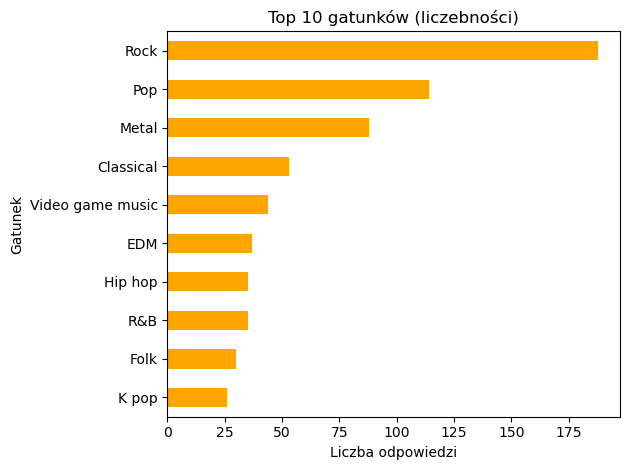

In [21]:
col_genre = "Fav genre"
top_n = 10
vc = df[col_genre].value_counts(dropna=False).head(top_n)

plt.figure()
vc.sort_values().plot(kind="barh", color="orange")
plt.title(f"Top {top_n} gatunków (liczebności)")
plt.xlabel("Liczba odpowiedzi"); plt.ylabel("Gatunek")
plt.tight_layout(); plt.show()

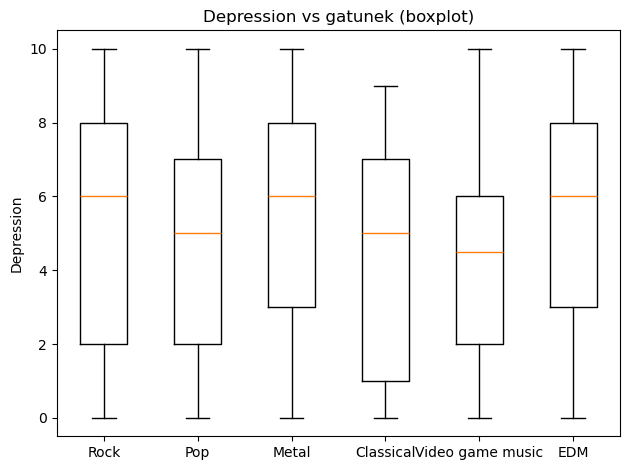

In [24]:
y_col = "Depression"
g_col = "Fav genre"
top = df[g_col].value_counts().head(6).index
sub = df[df[g_col].isin(top)][[g_col, y_col]].dropna()

groups = [sub[sub[g_col]==g][y_col].values for g in top]

plt.figure()
plt.boxplot(groups, tick_labels=list(top), vert=True)
plt.title(f"{y_col} vs gatunek (boxplot)")
plt.ylabel(y_col)
plt.tight_layout(); plt.show()

Pozostało obserwacji po IQR: 575


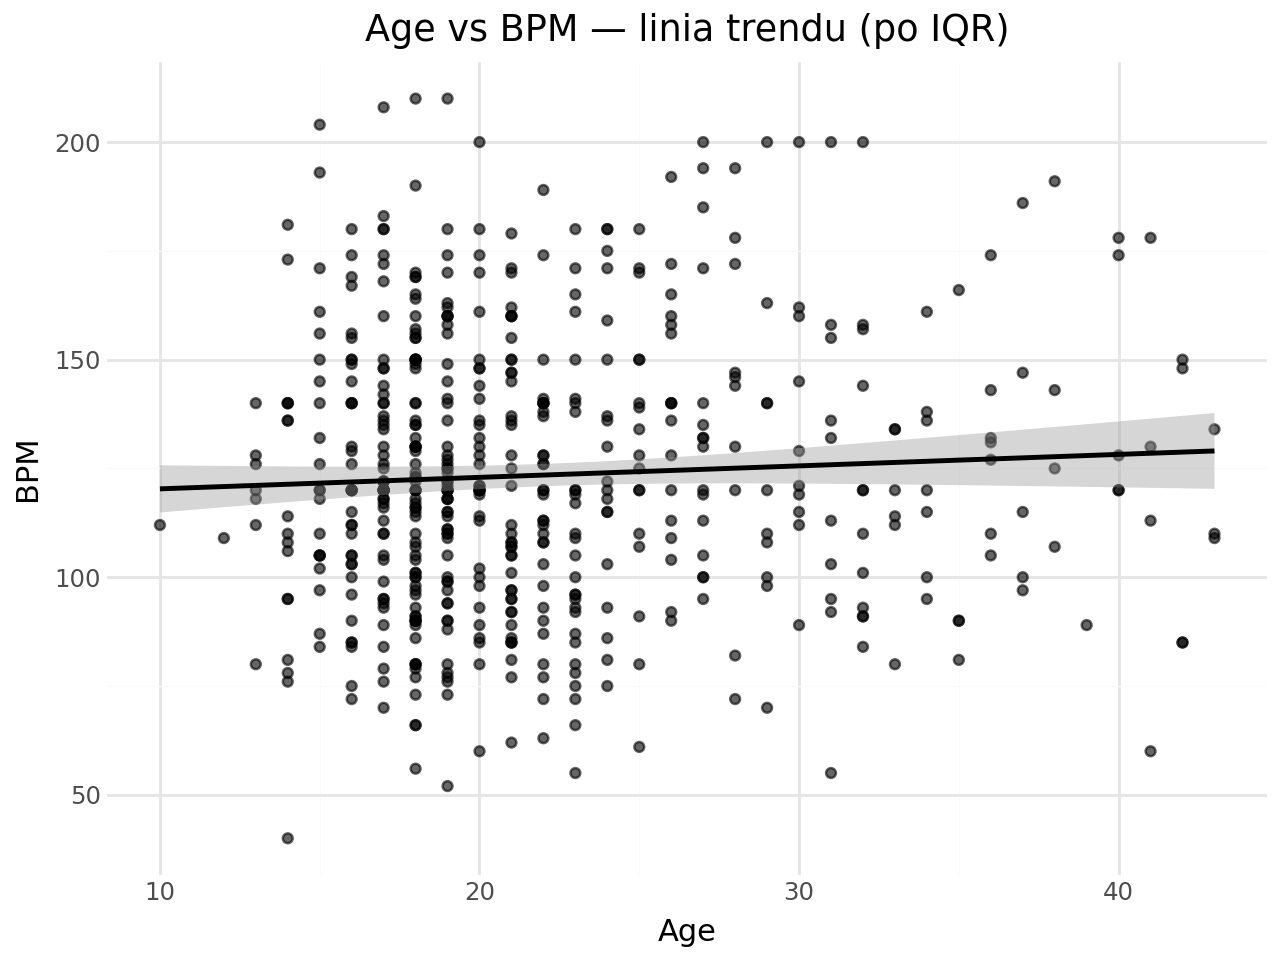

In [37]:
def drop_outliers_iqr(s, k=1.5):
    s = pd.to_numeric(s, errors="coerce")
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - k*iqr, q3 + k*iqr
    return s[(s >= low) & (s <= high)]

age_clean = drop_outliers_iqr(df["Age"], k=1.5)
bpm_clean = drop_outliers_iqr(df["BPM"], k=1.5)

sub = pd.DataFrame({"Age": age_clean, "BPM": bpm_clean}).dropna()

print(f"Pozostało obserwacji po IQR: {len(sub)}")

(
    ggplot(sub)
    + aes(x="Age", y="BPM")
    + geom_point(alpha=0.6)
    + geom_smooth(method="lm", se=True)
    + ggtitle("Age vs BPM — linia trendu (po IQR)")
    + xlab("Age") + ylab("BPM")
    + theme_minimal()
)

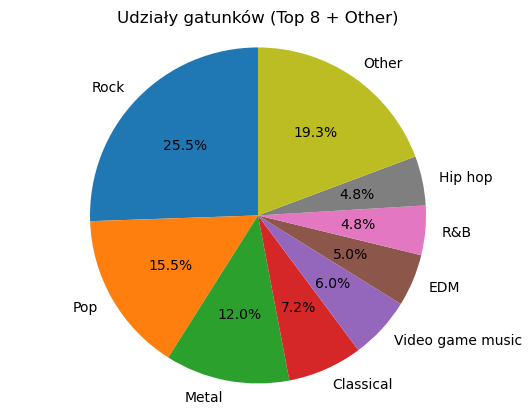

In [38]:
genre_col = "Fav genre"
top_n = 8

# policz częstości; brakujące nazwij "Missing"
vc = df[genre_col].fillna("Missing").value_counts()

top = vc.head(top_n)
other = vc.iloc[top_n:].sum()

# zamiast Series.append → pd.concat
plot_series = top if other == 0 else pd.concat([top, pd.Series({"Other": other})])

# rysuj
plt.figure()
plt.pie(
    plot_series.values,
    labels=plot_series.index.astype(str),
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Udziały gatunków (Top {top_n}" + (" + Other" if other > 0 else "") + ")")
plt.axis("equal")
plt.show()